# Implementasi Convulational Neural Network Pada Pengenalan Tulisan Tangan Aksara Sunda

_**Ridho (1610631170181) - Universitas Singaperbangsa Karawang**_

Notebook ini merupakan demo dari proses pengenalan aksara sunda menggunakan convolutional neural network.

In [1]:
import glob
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL.ImageOps as ImOps

## Preproccesing
Tahap ini mengubah data gambar kedalam bentuk array serta melakukan resize dan normalisasi

In [2]:
def prepare_dataset(path):
    x_train=[]
    y_train=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img = ImOps.invert(img)
                img=img_to_array(img)
                img=img/255.0
                x_train.append(img)
                y_train.append(label)
    return np.array(x_train),np.array(y_train)

In [3]:
x_train, y_train = prepare_dataset('train/')
x_test, y_test = prepare_dataset('test/')

In [4]:
print("Shape x_train :",x_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape x_train :",x_test.shape)
print("Shape y_train:", y_test.shape)

Shape x_train : (3780, 64, 64, 3)
Shape y_train: (3780,)
Shape x_train : (1620, 64, 64, 3)
Shape y_train: (1620,)


## Data Augmetation

Data augmentasi yang digunakan pada data platihan.
- rotasi = 10°
- Pergeseran(w,h) = (0.1, 0.1)
- Zoom = 0.3

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)

datagen.fit(x_train, augment=True)
data_test = datagen.flow(x_train, y_train, batch_size=5)

Using TensorFlow backend.


Train Augmetasi Data


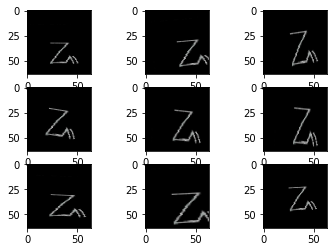

In [6]:
from numpy import expand_dims
import matplotlib.pyplot as plt

img = x_train[1250]
samples = expand_dims(img, 0)
it = datagen.flow(samples, batch_size=1)
print("Train Augmetasi Data")
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

## Arsitektur CNN

Pada penelitian ini menggunakan 3 arsitektur CNN untuk klasifikasi aksara sunda
1. LeNet-5
2. VGG-16

Pada tahap platihan dalam penelitian ini mengunakan fungsi EarlyStoping dari libarary Keras,

### 1. LeNet-5

In [7]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

def modelLeNet():
    model = Sequential()

    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))

    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(120, (5, 5), activation='relu'))

    model.add(Flatten())

    model.add(Dense(84, activation='relu'))

    model.add(Dense(18, activation = 'softmax'))
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelLeNet().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9720)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [8]:
LeNet_Aug = modelLeNet()
LeNet_without_Aug = modelLeNet()

In [9]:
history_Lenet = LeNet_without_Aug.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Train on 3780 samples, validate on 1620 samples
Epoch 1/15
3780/3780 [==============================] - 11s 3ms/step - loss: 2.5646 - acc: 0.2159 - val_loss: 2.0600 - val_acc: 0.3765
Epoch 2/15
3780/3780 [==============================] - 11s 3ms/step - loss: 1.7382 - acc: 0.4772 - val_loss: 1.4919 - val_acc: 0.5469
Epoch 3/15
3780/3780 [==============================] - 12s 3ms/step - loss: 1.2137 - acc: 0.6360 - val_loss: 1.0868 - val_acc: 0.6648
Epoch 4/15
3780/3780 [==============================] - 11s 3ms/step - loss: 0.8227 - acc: 0.7540 - val_loss: 0.8101 - val_acc: 0.7636
Epoch 5/15
3780/3780 [==============================] - 11s 3ms/step - loss: 0.5700 - acc: 0.8331 - val_loss: 0.6636 - val_acc: 0.8080
Epoch 6/15
3780/3780 [==============================] - 12s 3ms/step - loss: 0.4119 - acc: 0.8796 - val_loss: 0.5190 - val_acc: 0.8475
Epoch 7/15
3780/3780 [==============================] - 13s 4ms/step - loss: 0.3121 - acc: 0.9087 - val_loss: 0.5403 - val_acc: 0.8198
Epoch 8

In [10]:
history_Lenet_Aug = LeNet_Aug.fit(data_test,validation_data=(x_test,y_test),
          steps_per_epoch=len(x_train)/5, epochs=15)

Epoch 1/15
756/756 [==============================] - 25s 33ms/step - loss: 2.6014 - acc: 0.1849 - val_loss: 1.6716 - val_acc: 0.4722
Epoch 2/15
756/756 [==============================] - 23s 31ms/step - loss: 1.5988 - acc: 0.4873 - val_loss: 0.7450 - val_acc: 0.7821
Epoch 3/15
756/756 [==============================] - 23s 30ms/step - loss: 1.0248 - acc: 0.6765 - val_loss: 0.5402 - val_acc: 0.8340
Epoch 4/15
756/756 [==============================] - 23s 31ms/step - loss: 0.7998 - acc: 0.7500 - val_loss: 0.3448 - val_acc: 0.8920
Epoch 5/15
756/756 [==============================] - 23s 30ms/step - loss: 0.6688 - acc: 0.7886 - val_loss: 0.3209 - val_acc: 0.8907
Epoch 6/15
756/756 [==============================] - 23s 30ms/step - loss: 0.5472 - acc: 0.8220 - val_loss: 0.2519 - val_acc: 0.9136
Epoch 7/15
756/756 [==============================] - 23s 30ms/step - loss: 0.4728 - acc: 0.8492 - val_loss: 0.1942 - val_acc: 0.9358
Epoch 8/15
756/756 [==============================] - 23s 30ms

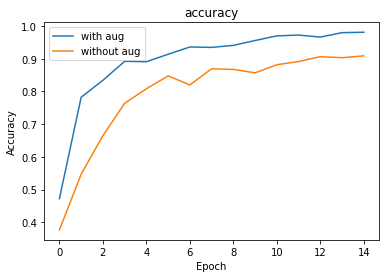

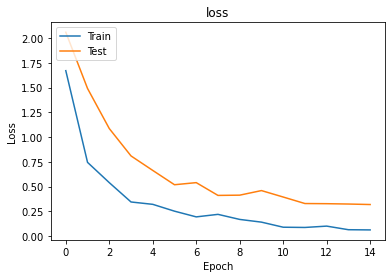

In [11]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Lenet_Aug.history['val_acc'])
plt.plot(history_Lenet.history['val_acc'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug','train with aug', 'train without aug'], loc='upper left')
plt.show()

plt.plot(history_Lenet_Aug.history['val_loss'])
plt.plot(history_Lenet.history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
Dari hasil 2

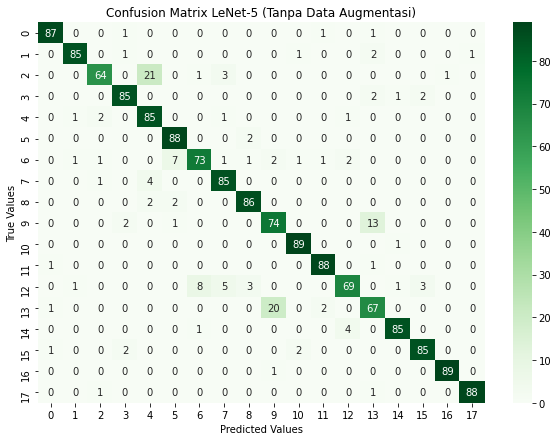

Akurasi yang didapat 0.909 %


In [12]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
label = np.arange(0,18)
from sklearn.metrics import confusion_matrix
LnetAugwithout_pred = LeNet_without_Aug.predict(x_test) 
LnetAugwithout_pred = np.argmax(LnetAugwithout_pred, 1) 

mat = confusion_matrix(y_test,LnetAugwithout_pred)
df_cm = pd.DataFrame(mat, label,label)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Greens")
plt.title('Confusion Matrix LeNet-5 (Tanpa Data Augmentasi)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

from sklearn.metrics import accuracy_score
print("Akurasi yang didapat {:.3f} %".format(accuracy_score(y_test, LnetAugwithout_pred)))

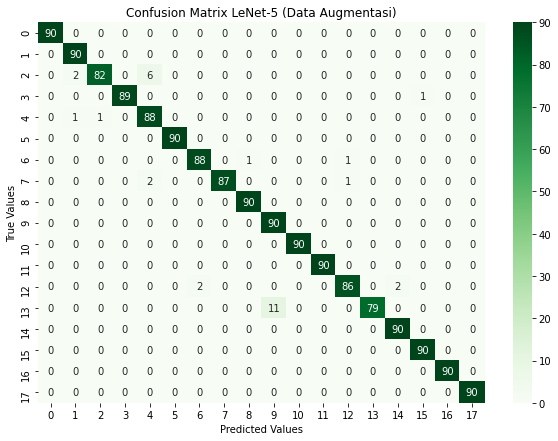

Akurasi yang didapat 0.981 %


In [13]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
label = np.arange(0,18)
from sklearn.metrics import confusion_matrix
LnetAug_pred = LeNet_Aug.predict(x_test)
LnetAug_pred = np.argmax(LnetAug_pred, 1) 

mat = confusion_matrix(y_test,LnetAug_pred)
df_cm = pd.DataFrame(mat, label,label)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Greens")
plt.title('Confusion Matrix LeNet-5 (Data Augmentasi)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

from sklearn.metrics import accuracy_score
print("Akurasi yang didapat {:.3f} %".format(accuracy_score(y_test, LnetAug_pred)))

### 2. VGG16

In [14]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
local_weights_file = 'D:/Belajar/skripsi/ngalegena/pretrained/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
def modelVgg16():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(64, 64, 3)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    
    model.load_weights(local_weights_file)
    for layer in model.layers:
        layer.trainable = False
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(18, activation='softmax'))
    
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelVgg16().summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 256)      

In [15]:
Vgg_Aug = modelVgg16()
Vgg_without_Aug = modelVgg16()

In [16]:
history_Vgg = Vgg_without_Aug.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Train on 3780 samples, validate on 1620 samples
Epoch 1/15
3780/3780 [==============================] - 120s 32ms/step - loss: 2.5703 - acc: 0.2188 - val_loss: 1.9700 - val_acc: 0.6340
Epoch 2/15
3780/3780 [==============================] - 115s 30ms/step - loss: 1.7668 - acc: 0.5593 - val_loss: 1.4289 - val_acc: 0.7636
Epoch 3/15
3780/3780 [==============================] - 114s 30ms/step - loss: 1.3246 - acc: 0.6921 - val_loss: 1.1034 - val_acc: 0.8111
Epoch 4/15
3780/3780 [==============================] - 129s 34ms/step - loss: 1.0525 - acc: 0.7688 - val_loss: 0.8892 - val_acc: 0.8481
Epoch 5/15
3780/3780 [==============================] - 121s 32ms/step - loss: 0.8896 - acc: 0.7947 - val_loss: 0.7490 - val_acc: 0.8753
Epoch 6/15
3780/3780 [==============================] - 118s 31ms/step - loss: 0.7548 - acc: 0.8310 - val_loss: 0.6352 - val_acc: 0.8938
Epoch 7/15
3780/3780 [==============================] - 126s 33ms/step - loss: 0.6553 - acc: 0.8534 - val_loss: 0.5530 - val_acc: 

In [17]:
history_Vgg_Aug = Vgg_Aug.fit(data_test,validation_data=(x_test,y_test),
          steps_per_epoch=len(x_train) / 5, epochs=15)

Epoch 1/15
756/756 [==============================] - 161s 213ms/step - loss: 2.2339 - acc: 0.3437 - val_loss: 1.4874 - val_acc: 0.6691
Epoch 2/15
756/756 [==============================] - 172s 227ms/step - loss: 1.3914 - acc: 0.6135 - val_loss: 0.9894 - val_acc: 0.8019
Epoch 3/15
756/756 [==============================] - 166s 220ms/step - loss: 1.0530 - acc: 0.6963 - val_loss: 0.7174 - val_acc: 0.8586
Epoch 4/15
756/756 [==============================] - 164s 216ms/step - loss: 0.8596 - acc: 0.7542 - val_loss: 0.5826 - val_acc: 0.8747
Epoch 5/15
756/756 [==============================] - 173s 229ms/step - loss: 0.7294 - acc: 0.7873 - val_loss: 0.4612 - val_acc: 0.9105
Epoch 6/15
756/756 [==============================] - 164s 217ms/step - loss: 0.6313 - acc: 0.8180 - val_loss: 0.3923 - val_acc: 0.9309
Epoch 7/15
756/756 [==============================] - 160s 212ms/step - loss: 0.5629 - acc: 0.8444 - val_loss: 0.3477 - val_acc: 0.9272
Epoch 8/15
756/756 [============================

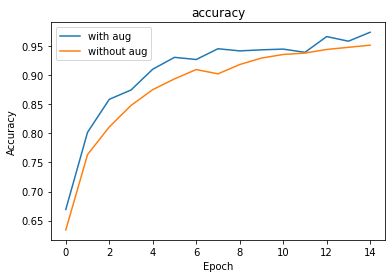

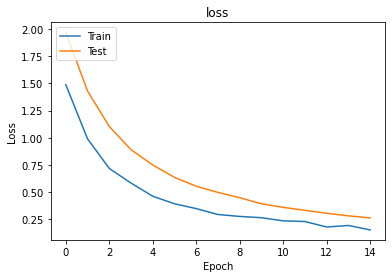

In [18]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Vgg_Aug.history['val_acc'])
plt.plot(history_Vgg .history['val_acc'])
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug','train with aug', 'train without aug'], loc='upper left')
plt.show()

plt.plot(history_Vgg_Aug.history['val_loss'])
plt.plot(history_Vgg .history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

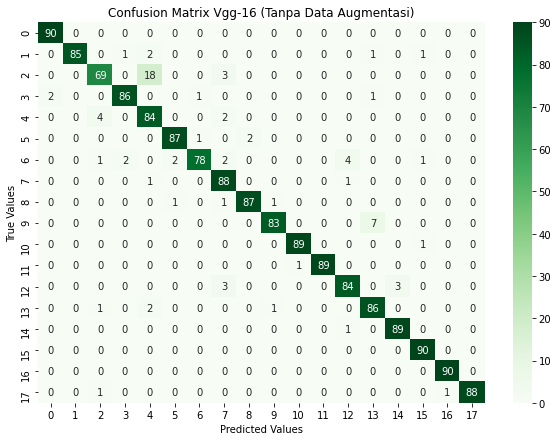

Akurasi yang didapat 0.952 %


In [19]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
label = np.arange(0,18)
from sklearn.metrics import confusion_matrix
VggAugwithout_pred = Vgg_without_Aug.predict(x_test) 
VggAugwithout_pred = np.argmax(VggAugwithout_pred, 1) 

mat = confusion_matrix(y_test,VggAugwithout_pred)
df_cm = pd.DataFrame(mat, label,label)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Greens")
plt.title('Confusion Matrix Vgg-16 (Tanpa Data Augmentasi)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

from sklearn.metrics import accuracy_score
print("Akurasi yang didapat {:.3f} %".format(accuracy_score(y_test, VggAugwithout_pred)))

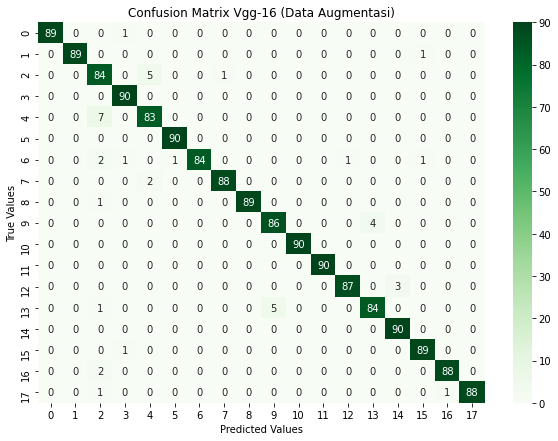

Akurasi yang didapat 0.974 %


In [20]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
label = np.arange(0,18)
from sklearn.metrics import confusion_matrix
VggAug_pred = Vgg_Aug.predict(x_test)
VggAug_pred = np.argmax(VggAug_pred, 1) 

mat = confusion_matrix(y_test,VggAug_pred)
df_cm = pd.DataFrame(mat, label,label)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Greens")
plt.title('Confusion Matrix Vgg-16 (Data Augmentasi)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

from sklearn.metrics import accuracy_score
print("Akurasi yang didapat {:.3f} %".format(accuracy_score(y_test, VggAug_pred)))

In [21]:
def pred_dataset(path):
    x_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(64,64))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
    return np.array(x_train)

In [22]:
pred_img = pred_dataset('pred/aPredic/')
pred_img.shape

(270, 64, 64, 3)

In [23]:
def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
    classl = labels[class_code]
    
    return classl

In [24]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from random import randint
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_img))
    pred_image = np.array([pred_img[rnd_number]])
    x = np.argmax(model_aug.predict(pred_image)[0])
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow((pred_image[0]*255).astype(np.uint8))
            ax.set_title(get_classlabel(x))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)


fig.show()

NameError: name 'model_aug' is not defined

<Figure size 2160x2160 with 0 Axes>

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model_aug.predict(x_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) 

mat = confusion_matrix(y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
label = np.arange(0,18)
get_classlabel
df_cm = pd.DataFrame(mat, label,label)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Greens")
from sklearn.metrics import cclassification_report
print (classification_report(y_test, y_pred))

In [ ]:
img=load_img("pred/5.jpg", target_size=(64,64))
img=img_to_array(img)
img=img/255.0
x = np.expand_dims(img, axis=0)
x = np.argmax(LeNet_Aug.predict(x)[0])
imgplot = plt.imshow(img)
print(get_classlabel(x))
plt.show()
img

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(LeNet_Aug, 'models')

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(Vgg_Aug, 'models')